## Projeto de Redes Sociais

In [1]:
import freeman as fm
import statsmodels.api as sm
import networkx as nx
import pylab

In [2]:
def proportion(g, n, m):
    return 1 / g.degree(n)

def local_effsize(g, n, m):
    s = 1
    for k in g.neighbors(n):
        if g.has_edge(k, m):
            s -= proportion(g, n, k)
    return s

def effsize(g, n):
    s = 0
    for m in g.neighbors(n):
        s += local_effsize(g, n, m)
    return s

In [3]:
g = fm.load('data/lol_teams.gml')

In [4]:
g.set_all_nodes(size=15, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))
g.move('kamada_kawai')
g.draw()

In [5]:
teams_perf = []
teams_eff = []
for n in g.nodes:
    teams_perf.append(g.nodes[n]['perf'])
    teams_eff.append(effsize(g, n))

<ipython-input-6-498bfeeffab0>:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



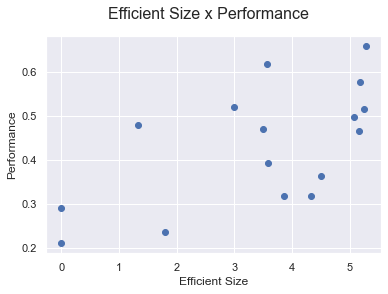

In [6]:
ax = pylab.subplot(111)
ax.scatter(teams_eff, teams_perf)
pylab.xlabel('Efficient Size')
pylab.ylabel('Performance')
pylab.suptitle('Efficient Size x Performance', fontsize=16)
ax.figure.show()

In [7]:
model = sm.OLS(teams_perf, teams_eff)
result = model.fit()
result.summary()

C:\Users\lchen\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              103.5
Date:                Sat, 14 Nov 2020   Prob (F-statistic):                    3.97e-08
Time:                        11:13:24   Log-Likelihood:                          6.5439
No. Observations:                  16   AIC:                                     -11.09
Df Residuals:                      15   BIC:                                     -10.32
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1090      0.011     10.175      0.000       0.086       0.132
==============================================================================
Omnibus:                        2.065   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.214
Skew:                           0.370   Prob(JB):                        0.545
Kurtosis:                       1.872   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""